In [3]:
# Import the data
import pandas as pd
# import pydotplus
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn import preprocessing 

# Models to use in our pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



from sklearn.tree import DecisionTreeRegressor

# Preprocessing dependencies
from sklearn.model_selection import train_test_split


# Metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from IPython.display import Image, display

In [4]:
df = pd.read_csv('data/valentine_gift.csv')
df.head()

,Gender,Age,Relationship_Status,Budget,Occasion,Preference,Relationship_Length,Personal_Interest,Past_Gift_Item,Past_Gift_Reaction,Recent_Purchase_1,Recent_Purchase_2,Recent_Purchase_3,Best_Gift
0,Male,56,Engaged,Low,Just Because,Adventurous,<6 months,Music,Tech Gadget,Loved it,Meal Kit Sub,Gym Membership,Magazine Sub,Fashion Accessory
1,Female,58,Single,Low,Anniversary,Surprise,6-12 months,Technology,Chocolates,Loved it,Phone Charger,Smart Speaker,Processor Chip,Fashion Accessory
2,Female,21,Single,Low,Valentine's Day,Romantic,5+ years,Cooking,Fashion Accessory,Loved it,Magazine Sub,Streaming Sub,Meal Kit Sub,Flowers
3,Other,60,Married,Very High,Anniversary,Sentimental,6-12 months,Music,Chocolates,Loved it,Meal Kit Sub,Gym Membership,Magazine Sub,Personalized Gift
4,Male,56,Engaged,Low,Just Because,Adventurous,<6 months,Music,Tech Gadget,Loved it,Meal Kit Sub,Gym Membership,Magazine Sub,Fashion Accessory


In [5]:
# merge two samilar value to one vlaue
def mergeData(df, column_name, value_one, value_two):
    df[column_name] = df[column_name].replace(value_one, value_two)
    
# encode column's value
def hot_encode(df):
       categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
       encoder = OneHotEncoder(sparse_output=False)
       one_hot_encoded = encoder.fit_transform(df[categorical_columns])

       one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
       df_encoded = pd.concat([df, one_hot_df], axis=1)
       df_encoded = df_encoded.drop(categorical_columns, axis=1)

       return df_encoded
    
def label_encode(df):
# label_encoder object knows  
# how to understand word labels. 
    label_encoder = preprocessing.LabelEncoder() 
    
    # Encode labels in column 'species'. 
    df['Best_Gift_Encoded']= label_encoder.fit_transform(df['Best_Gift']) 
    
    df['Best_Gift_Encoded'].unique() 
    print(df[['Best_Gift', 'Best_Gift_Encoded']].head())

    return df['Best_Gift_Encoded']

def clean_data(df):
    
    # drop useless columns
    df = df.drop(columns = ['Past_Gift_Reaction'])

    # combine the samiliar values for few columns
    # mergeData(df, "Recipient_Gender", 'Non-Binary', 'Other')
    # mergeData(df, "Preference", "Sentimental", "Romantic")
    # mergeData(df, "Personal_Interest", "Sports", "Fitness")
    # mergeData(df, "Personal_Interest", "Gaming", "Technology")
    # mergeData(df, "Best_Gift", "Handmade Gift", "Personalized Gift")
    # mergeData(df, "Best_Gift", "Chocolates", "Chocolates & Flowers")
    # mergeData(df, "Best_Gift", "Flowers", "Chocolates & Flowers")
    # mergeData(df, "Best_Gift", "Jewelry", "Fashion Accessories")


    # split X and y
    # use hot encoding to encode some columns in x 
    X = df.drop(columns=['Best_Gift'])
    X = hot_encode (X)

    # use OrdinalEncoder to encode "Best_Gift" column and get y
    y = label_encode(df)

    
    return X, y

In [6]:
def r2_adj(X, y, model):
    """
    Calculates adjusted r-squared values

    Args:
    X: Independent variables, the data to fit
    y: dependent variable, the target data to try to predict
    model: The estimator or object to use to train the data

    Returns: adjusted r sqaured value accountign for number of predictors
    """
    r2 = model.score(X, y)
    n = X.shape[0]
    p = y.ndim


def model_generator(X, y):
    y = y.values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

    models = {
        "RF": RandomForestClassifier(),
        'DT': DecisionTreeClassifier(),
        'SVC': SVC(),
        'AB': AdaBoostClassifier()
    }


    for  name, model in models.items():
        pipeline = Pipeline([
            ("Scale", StandardScaler(with_mean=False)),
            (name, model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        print("name:", name, "score:", pipeline.score(X_test, y_test))
        # print(accuracy_score(y_test, y_pred))

    


In [7]:
X, y = clean_data(df)

           Best_Gift  Best_Gift_Encoded
0  Fashion Accessory                  1
1  Fashion Accessory                  1
2            Flowers                  2
3  Personalized Gift                  3
4  Fashion Accessory                  1


In [8]:
model_generator(X, y)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


name: RF score: 0.972
name: DT score: 0.966


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


name: SVC score: 0.956


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


name: AB score: 0.564


In [9]:
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y)
model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)
print(accuracy_score(y_test, y_test_predict))

0.966


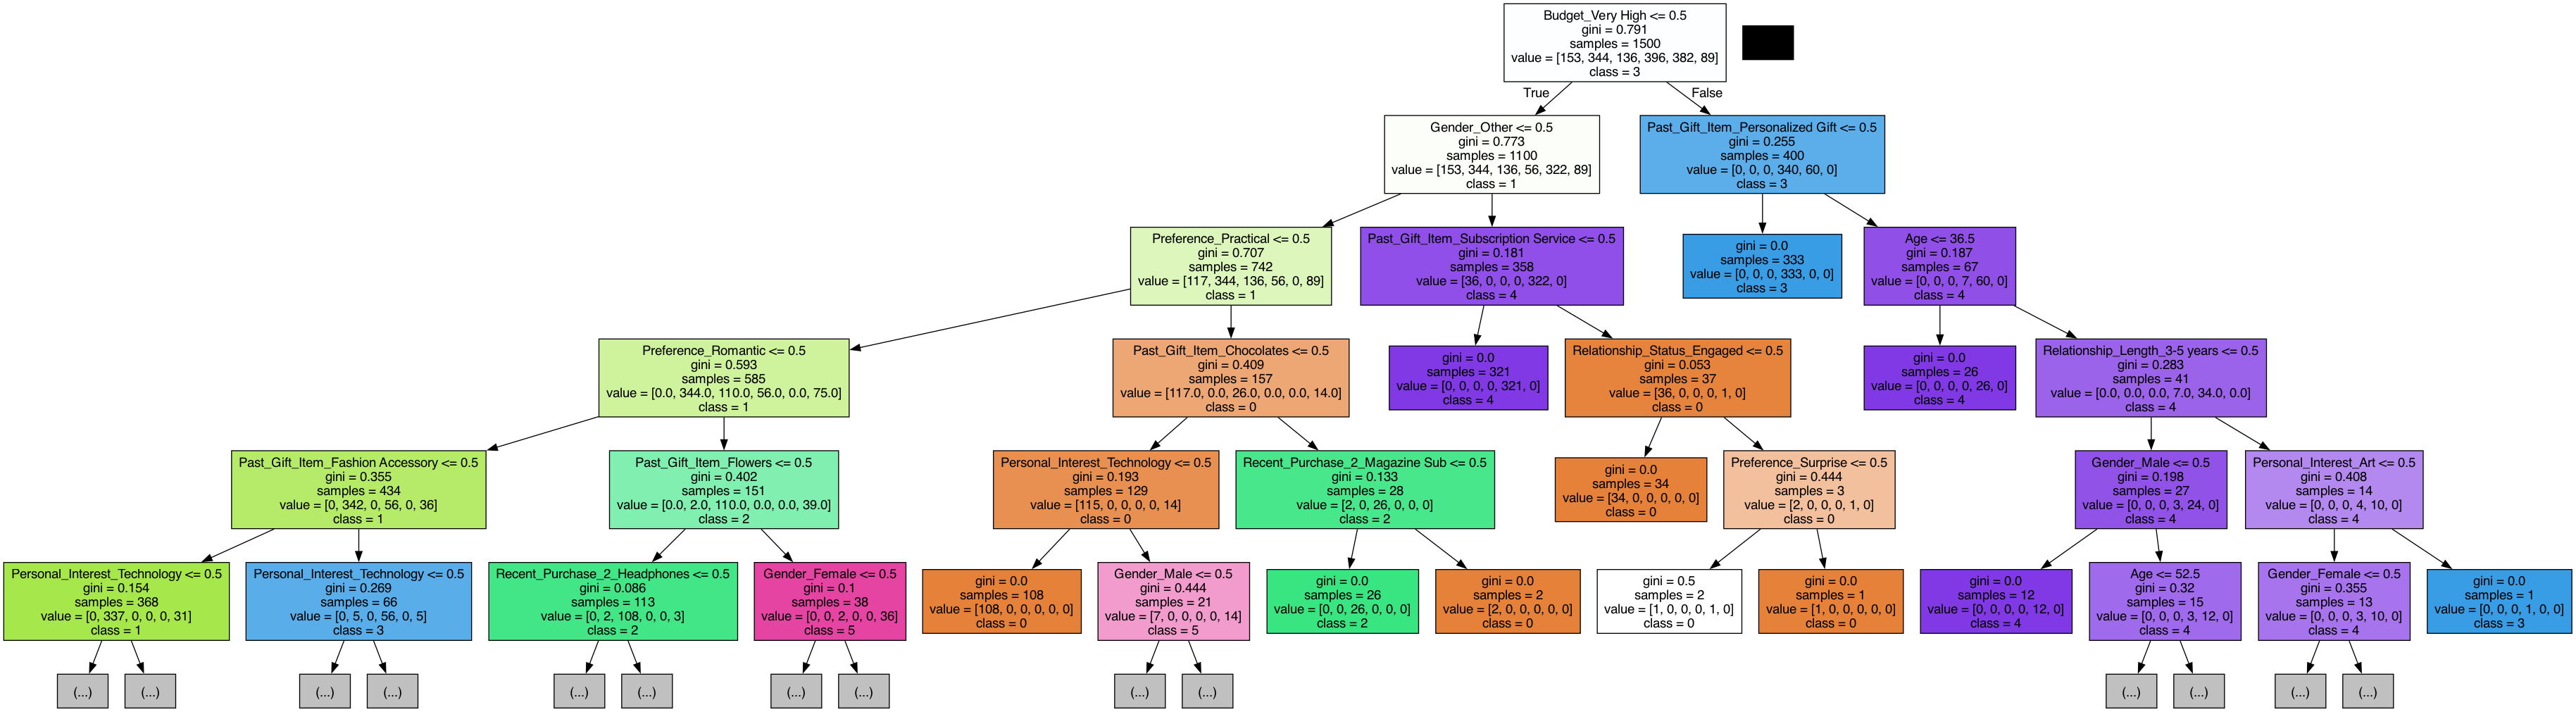

In [27]:
dot_data = export_graphviz(model, 
                                out_file=None,
                                feature_names=X.columns, 
                                class_names=["0", "1", "2", "3", "4", "5"], 
                                filled=True,
                                max_depth=5
                               )

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_pdf("gift_picker_decision.pdf")

Image(graph.create_png())

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Sample dataset (replace with your actual dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a DecisionTreeClassifier
model = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Measure to split nodes
    'max_depth': [3, 5, 10],  # Maximum depth of tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions on test set
y_test_predict = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_test_predict)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Set Accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Test Set Accuracy: 0.9950


In [9]:
cv_results = pd.DataFrame(grid_search.cv_results_)
score_df = cv_results[['param_criterion', 'param_max_depth', 'param_min_samples_split', 
                       'param_min_samples_leaf', 'mean_test_score', 'rank_test_score']]
score_df = score_df.sort_values(by='rank_test_score')

display(score_df)


,param_criterion,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score,rank_test_score
50,entropy,10,10,2,0.971875,1
20,gini,10,10,1,0.971875,1
19,gini,10,5,1,0.971875,1
48,entropy,10,2,2,0.971250,4
46,entropy,10,5,1,0.971250,4
18,gini,10,2,1,0.971250,4
53,entropy,10,10,4,0.970625,7
23,gini,10,10,2,0.970625,7
21,gini,10,2,2,0.970625,9
49,entropy,10,5,2,0.970000,10


In [24]:
// Correlation graph [Rakesh]
// analyzed

// Usage of hyperparameters []

//Update README. [Sophak]


---- presentation
0. Intro [Gab] 
1. Data Prep. [Gab] 
2. Model Pre-Processing - Optimization -> Dropping columns, Scalers, Encoding [Yujing]
3. Model Creation -> correlation, [Sophak]
       random forest vs desicion tree, dot graphs
4. Data Analysis -> popular gifts, highest purchases [Leonard][Leslie]
5. Demo (Record gif 30s), next steps, questions [Leslie]
----------

1. Gift using Team member data
2. Add gifts icons/images to a slide 

TODO::
Check deliverables of a project.


SyntaxError: invalid decimal literal (2413476806.py, line 23)

In [17]:
import numpy as np
np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [2]:
!pip install pydotplus

In [2]:
!conda install -c conda-forge pydotplus

/opt/anaconda3/lib/python3.12/site-packages/conda/base/context.py:200: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(
doneieving notices: - 
/opt/anaconda3/lib/python3.12/site-packages/conda/base/context.py:200: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/con